<a href="https://colab.research.google.com/github/arturcgs/Book_Studies/blob/main/Introduction_Statistical_Learning/Labs/LabCap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import itertools
import time
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# imporing the dataset

url = 'https://raw.githubusercontent.com/arturcgs/Book_Studies/main/Introduction_Statistical_Learning/DataSets/Hitters.csv'
hitters = pd.read_csv(url)
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [5]:
# droppings NaNs

print(f'There are {hitters.shape[0]} players. {hitters.Salary.isna().sum()} players have NaN salaries')
hitters_df_clean = hitters.dropna()
print(f'After dropping NaNs, there are {hitters_df_clean.shape[0]} players left')

There are 322 players. 59 players have NaN salaries
After dropping NaNs, there are 263 players left


In [6]:
# dealing with categorical variables
dummies = pd.get_dummies(hitters_df_clean[['League', 'Division', 'NewLeague']]) # creating dummies
hitters_df_clean = hitters_df_clean.drop(['League', 'Division', 'NewLeague'], axis=1).astype('float64') # dropping former collumns
X = pd.concat([hitters_df_clean, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1) # adding categorical varibles
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0


In [7]:
# saving prediction variable (y)
y = hitters_df_clean.Salary

In [9]:
#Defining function that calculates RSS for a specific set of features

def processSubset(y, feature_set):
    ''' (pandas.series), (list) --> (dictionary)
    This function recieves a y panda serires, that has the
    prediction variable values. 
    It also recieves a list with the features that 
    will be used in the calculation of the RSS.
    The funtion will fit a linear regression model, with the specified
    features, calculate the RSS, and save the model and the RSS
    in a dictionary
    '''
    model = LinearRegression().fit(X[list(feature_set)], y)
    RSS = ((model.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model": model, "RSS": RSS}

In [124]:
print('wow')

wow


### Testing making a graph with the regression line

In [97]:
def desenha_linha(model, x):
  return model.intercept_ + model.coef_[0] * x

In [98]:
X = X[X['CHits'] < 4000]
y = X.Salary

x = X[['CHits']]

regressor = LinearRegression()
lin_model = regressor.fit(x, y)

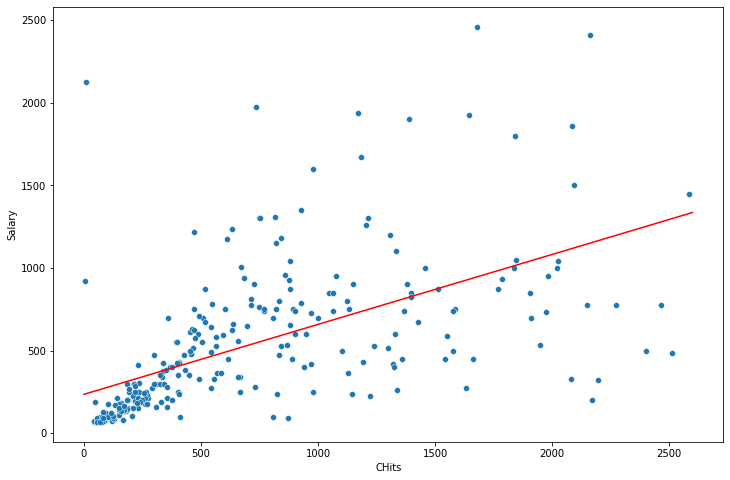

In [94]:
# plotando gráfico de uma variável só, com a resposta

fig, axs = plt.subplots(1, 1, figsize = (12, 8))

# scatterplot
sns.scatterplot(x = X['CHits'], y = y, ax=axs)

# regressão
eixo_x = np.linspace(0, 2600, num=2)
axs.plot(eixo_x, desenha_linha(lin_model, eixo_x), color = 'red')

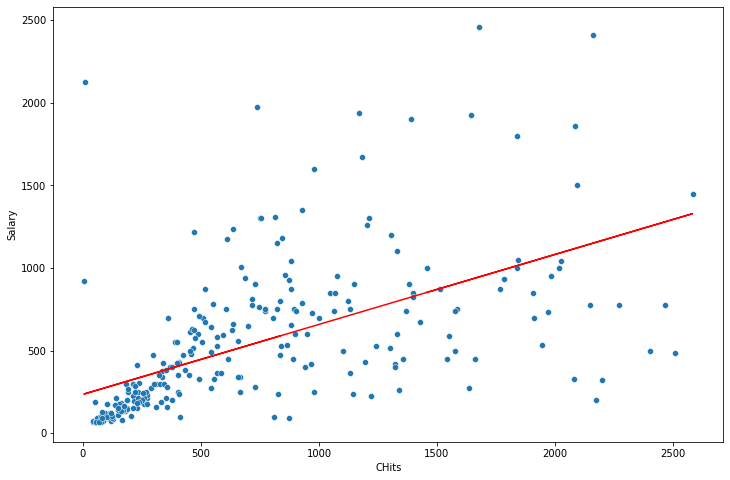

In [108]:
# plotando gráfico de uma variável só, com a resposta

fig, axs = plt.subplots(1, 1, figsize = (12, 8))

# scatterplot
sns.scatterplot(x = X['CHits'], y = y, ax=axs)

# regressão
axs.plot(X['CHits'], lin_model.predict(X[['CHits']]), color = 'red')